# Automatidata Taxi Fare Prediction Model

#### Step 1: Inspecting and Analyzing Data

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


#### The summary of variables shows that trip distance, total amount are the variables that need to be analyzed as they have different value pattern.

In [5]:
sorted_trip_distance = df.sort_values(by='trip_distance',ascending=False)[['trip_distance']]
sorted_trip_distance.head(10)

,trip_distance
9280,33.96
13861,33.92
6064,32.72
10291,31.95
29,30.83
18130,30.50
5792,30.33
15350,28.23
10302,28.20
2592,27.97


In [6]:
sorted_total_amount = df.sort_values(by = 'total_amount', ascending = False)[['total_amount']]
sorted_total_amount.head(10)

,total_amount
8476,1200.29
20312,450.30
13861,258.21
12511,233.74
15474,211.80
6064,179.06
16379,157.06
3582,152.30
11269,151.82
9280,150.30


#### It shows that the most expensive rides are not the longest ones.

In [7]:
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [8]:
avg_tip_cc = df[df['payment_type'] == 1]['tip_amount'].mean()
avg_tip_cc

2.7298001965279934

In [9]:
avg_tip_cash = df[df['payment_type'] == 2]['tip_amount'].mean()
avg_tip_cash

0.0

In [10]:
avg_tip_no_charge = df[df['payment_type'] == 3]['tip_amount'].mean()
avg_tip_no_charge

0.0

In [11]:
avg_tip_dispute = df[df['payment_type'] == 4]['tip_amount'].mean()
avg_tip_dispute

0.0

In [12]:
df['VendorID'].value_counts()

2    12626
1    10073
Name: VendorID, dtype: int64

In [13]:
df.groupby(['VendorID']).mean(numeric_only = True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


In [14]:
credit_card = df[df['payment_type'] == 1]
credit_card.groupby(['passenger_count']).mean(numeric_only = True)[['tip_amount']]

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


##### This initial inspection revealed that the variables that can be used to make a fare prediction model could be 'trip_duration' and 'total_amount'. 

#### Step 2: Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

C:\Users\uttam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
df.size

408582

In [17]:
df.shape

(22699, 18)

In [18]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Text(0.5, 1.0, 'trip_distance')

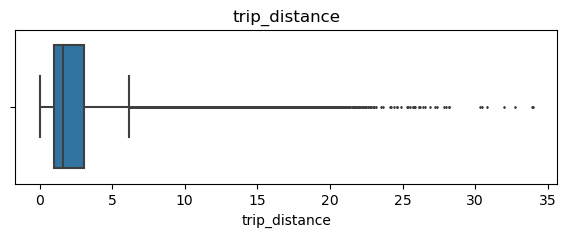

In [19]:
plt.figure(figsize=(7,2))
sns.boxplot(data = None, x=df['trip_distance'], fliersize = 1)
plt.title("trip_distance")

<Axes: xlabel='trip_distance', ylabel='Count'>

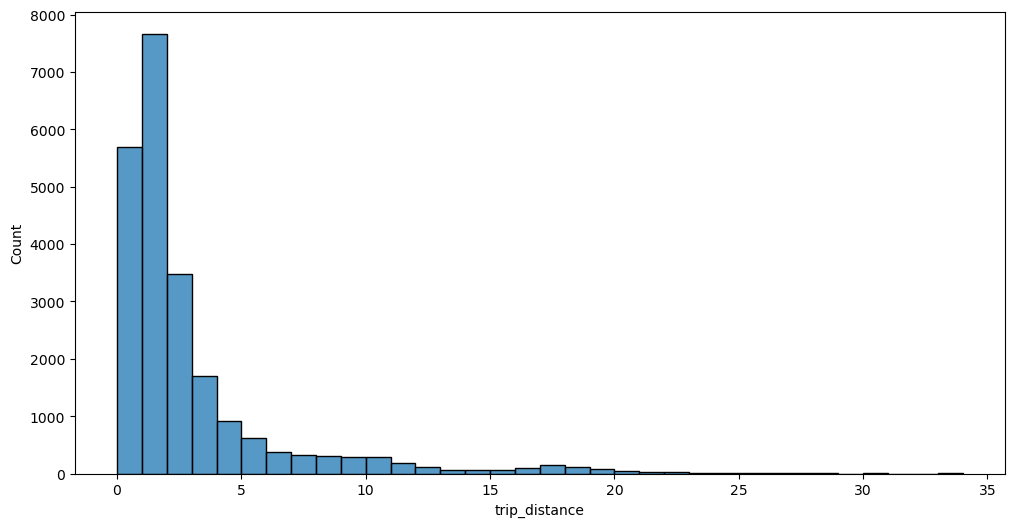

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['trip_distance'], bins = range(0,35,1))

Text(0.5, 1.0, 'Total Amount')

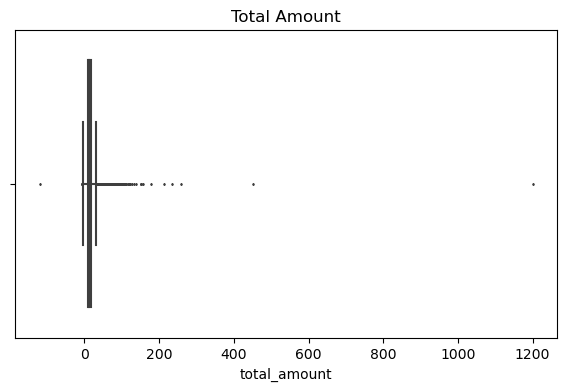

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(data=None, x=df['total_amount'], fliersize=1)
plt.title("Total Amount")

<Axes: xlabel='total_amount', ylabel='Count'>

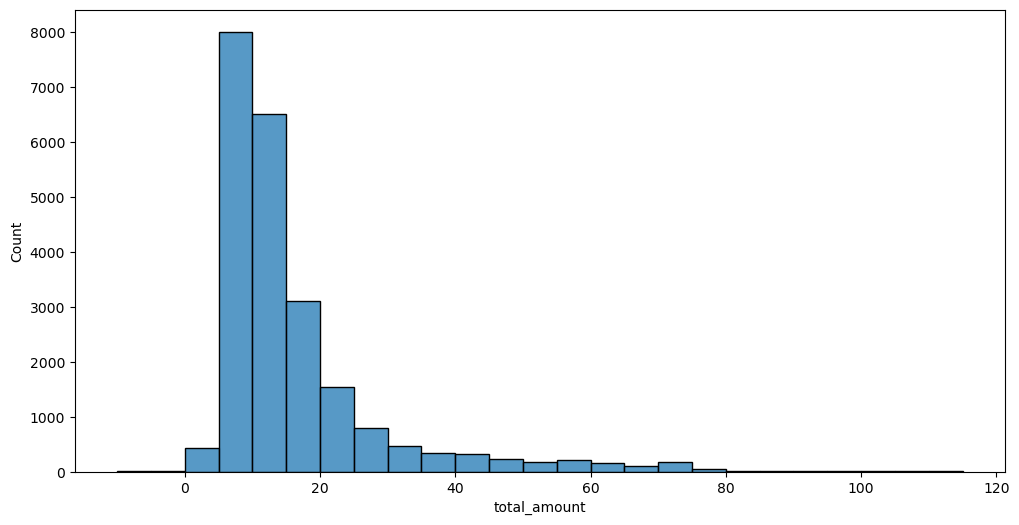

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(x= df['total_amount'], bins= range(-10,120,5))

Text(0.5, 1.0, 'Tip Amount')

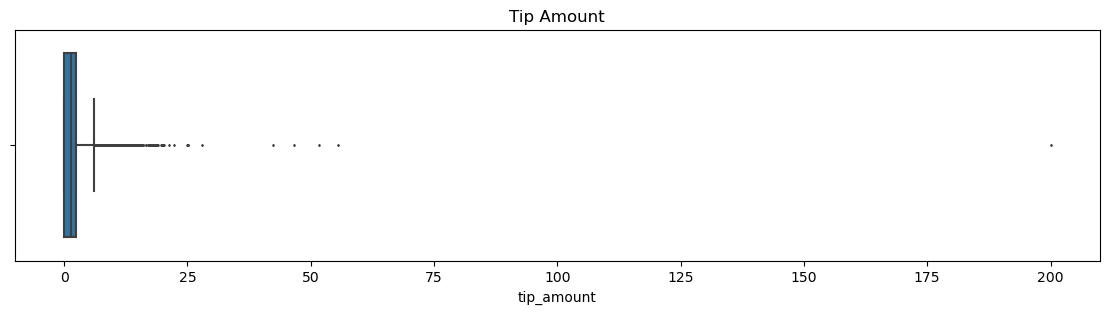

In [23]:
plt.figure(figsize = (14,3))
sns.boxplot(data = None, x = df['tip_amount'],fliersize = 1)
plt.title('Tip Amount')

<Axes: xlabel='tip_amount', ylabel='Count'>

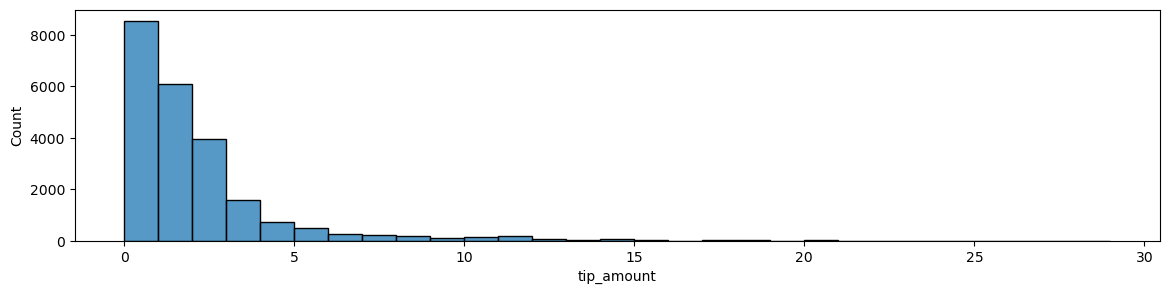

In [24]:
plt.figure(figsize=(14,3))
sns.histplot(x= df['tip_amount'],bins = range(0,30,1))

Text(0.5, 1.0, 'Tip Amount by Vendor ID')

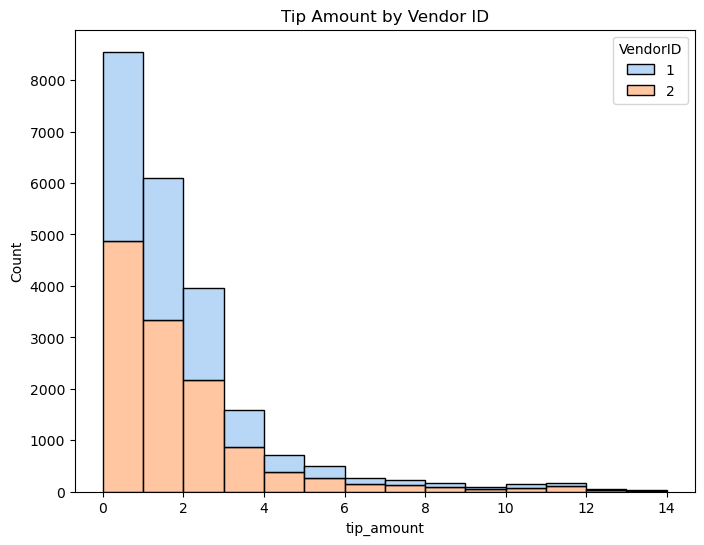

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x= 'tip_amount', bins = range(0,15,1), hue='VendorID',palette='pastel',multiple = 'stack')
plt.title("Tip Amount by Vendor ID")

Text(0.5, 1.0, 'Tip Amount by Vendor ID')

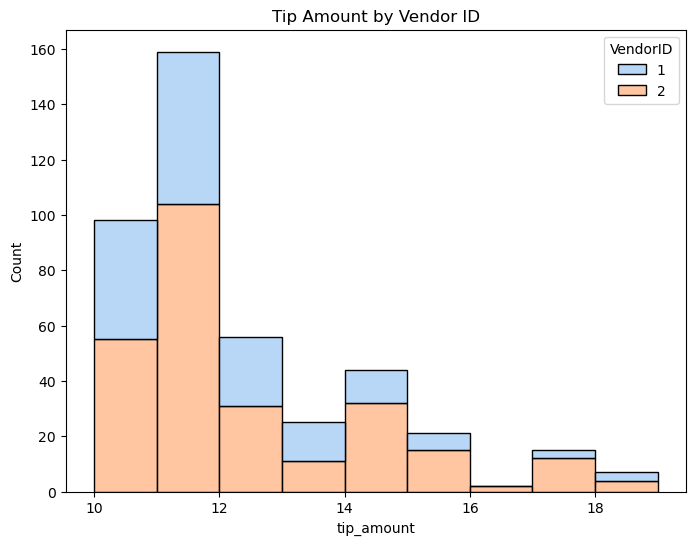

In [26]:
plt.figure(figsize=(8,6))
sns.histplot(data = df[df['tip_amount'] > 10], x= 'tip_amount', bins = range(10,20,1), hue='VendorID',palette='pastel',multiple = 'stack')
plt.title("Tip Amount by Vendor ID")

In [27]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [28]:
mean_tip_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tip_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Text(0.5, 1.0, 'Mean tip by Passenger Count')

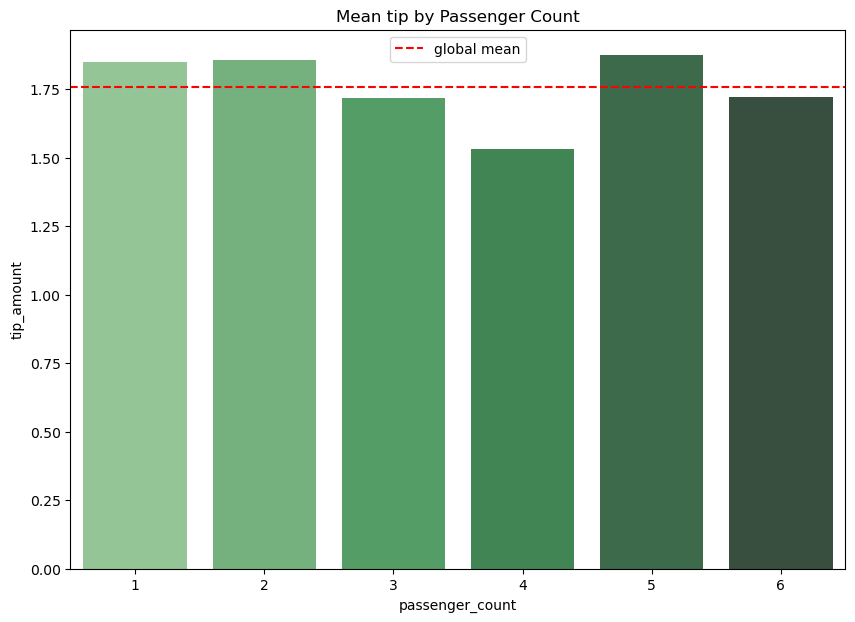

In [29]:
data = mean_tip_by_passenger_count.tail(-1)
plt.figure(figsize=(10,7))
ax = sns.barplot(x = data.index, y = data['tip_amount'],palette='Greens_d' )
ax.axhline(data['tip_amount'].mean(), ls = '--',color = 'red', label = 'global mean')
ax.legend()
plt.title("Mean tip by Passenger Count")


In [30]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [31]:
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [33]:
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

Text(0.5, 1.0, 'Monthly Rides')

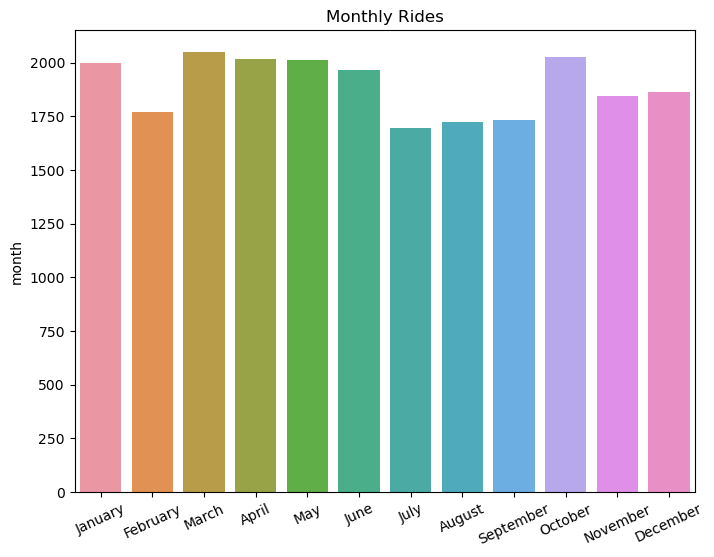

In [34]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides)
plt.xticks(rotation = 25)
plt.title("Monthly Rides")

In [35]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

In [36]:
daily_rides.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

Text(0.5, 1.0, 'Rides Count By Day')

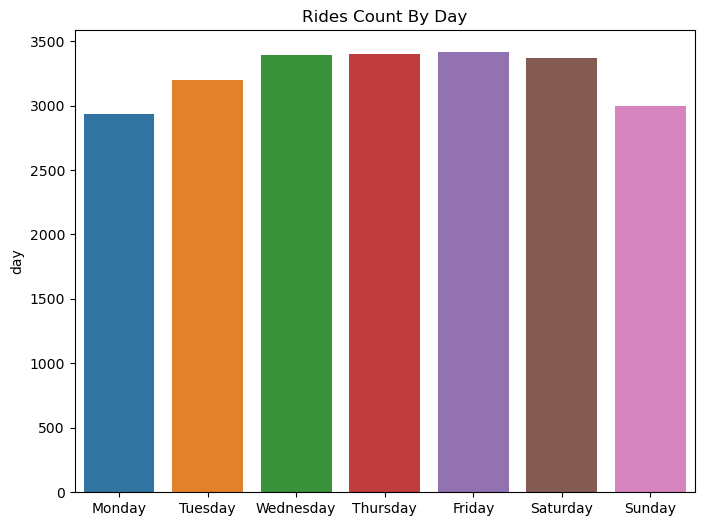

In [37]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = daily_rides.index, y = daily_rides)
plt.title('Rides Count By Day')

In [38]:
total_amount_day = df.groupby('day').mean()[['total_amount']]
total_amount_day

,total_amount
day,
Friday,16.354744
Monday,16.913808
Saturday,15.205049
Sunday,16.218833
Thursday,16.808322
Tuesday,16.424997
Wednesday,16.315773


In [39]:
total_amount_day = total_amount_day.reindex(index = day_order)
total_amount_day

,total_amount
day,
Monday,16.913808
Tuesday,16.424997
Wednesday,16.315773
Thursday,16.808322
Friday,16.354744
Saturday,15.205049
Sunday,16.218833


Text(0.5, 1.0, 'Revenue By Day')

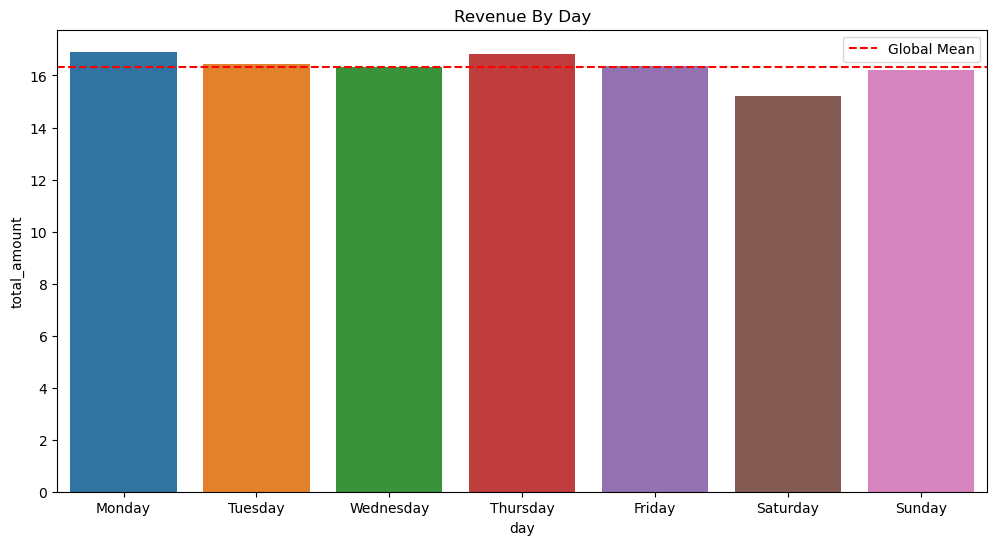

In [40]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day['total_amount'])
ax.axhline(total_amount_day['total_amount'].mean(), ls = '--', color = 'red', label = 'Global Mean')
ax.legend()
plt.title('Revenue By Day')

In [41]:
monthly_amount = df.groupby('month').sum()[['total_amount']]
monthly_amount

,total_amount
month,
April,32012.54
August,27759.56
December,31261.57
February,28937.89
January,31735.25
July,26617.64
June,32920.52
March,33085.89
May,33828.58


In [42]:
monthly_amount = monthly_amount.reindex(index = month_order)
monthly_amount

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Monthly Revenue Generated')

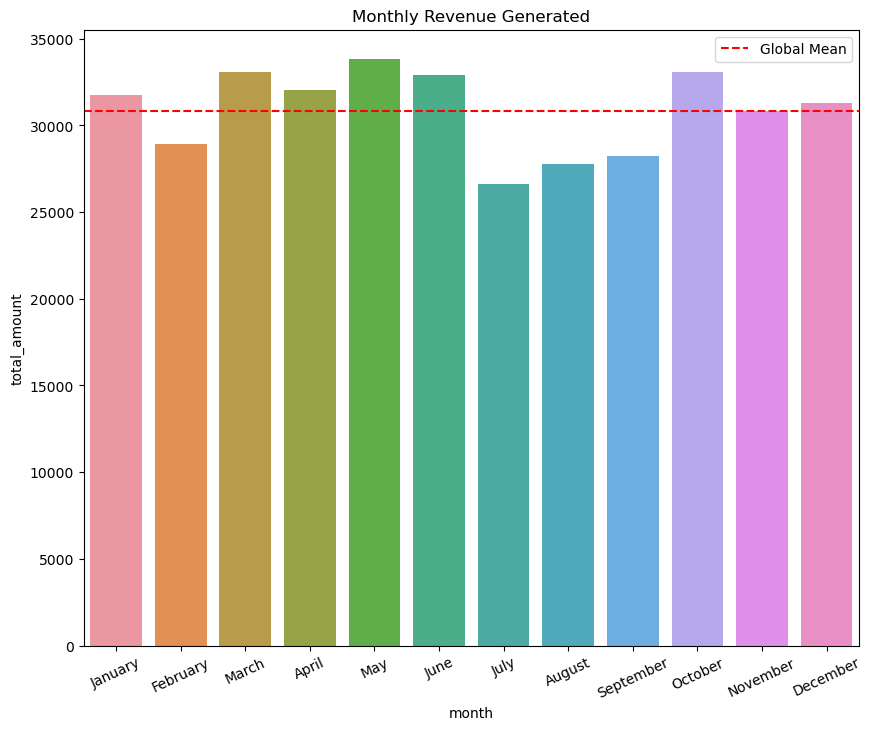

In [43]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = monthly_amount.index, y = monthly_amount['total_amount'])
plt.xticks(rotation = 25)
ax.axhline(monthly_amount['total_amount'].mean(), ls='--',color = 'red', label = 'Global Mean')
ax.legend()
plt.title("Monthly Revenue Generated")

In [44]:
df['DOLocationID'].nunique()

216

In [45]:
drop_off_distance = df.groupby('DOLocationID').mean()[['trip_distance']]
drop_off_distance = drop_off_distance.sort_values(by = 'trip_distance')
drop_off_distance

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean Trip Distance by Dropoff Location')

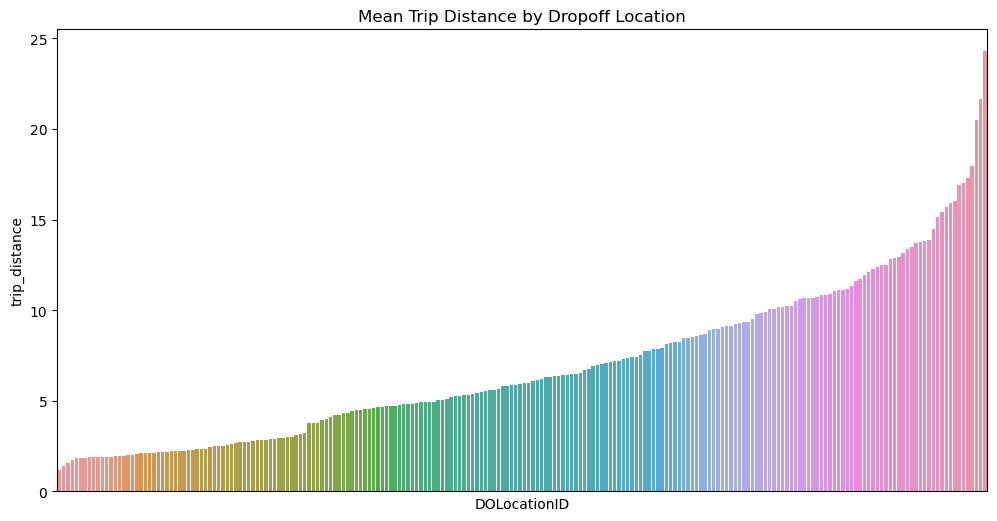

In [46]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = drop_off_distance.index, y = drop_off_distance['trip_distance'],order=drop_off_distance.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean Trip Distance by Dropoff Location')

#### Step 3 : Statistical Analysis

In [47]:
from scipy import stats

In [48]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [49]:
df.describe(include = 'all')

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')
C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,7
top,NaN,NaN,2017-07-03 15:45:19,2017-10-18 20:07:45,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,Friday
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049,3413
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,NaN,NaN
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,NaN,NaN
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,NaN,NaN
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,NaN,NaN


In [50]:
df.groupby('payment_type').mean()[['total_amount']]

,total_amount
payment_type,
1,17.663577
2,13.545821
3,13.579669
4,11.238261


In [51]:
 ##### Based on this conclusion, customers who pay with credit cards tend to pay more than those who pay in cash. However to verify this we will do hypothesis testing.

### Stating the Hypothesis:- 
#### H0: There is no difference in the average total fare amount between customers who pay with a credit card and customers who pay with cash.
#### H1: There is a difference in the average total fare amount between customers who pay with a credit card and customers who pay with cash.

In [52]:
credit_card = df[df['payment_type'] == 1]['total_amount']
cash = df[df['payment_type'] == 2]['total_amount']
stats.ttest_ind(a=credit_card, b= cash, equal_var= False)


Ttest_indResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91)

##### Since the p-value is significantly lower than the specified significance level, so reject the null hypothesis. Therefore there is a statistically significant difference in the amount paid by the customers with credit cards and customers who pay with cash. 

#### Conclusion: - The key insight that could be drawn here is customers can be encouraged to pay with credit cards as it will generate more revenue for taxi-cab drivers.

# Step 4: - Building Machine learning Model

In [53]:
from datetime import datetime
from datetime import date
from datetime import timedelta

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [55]:
df.shape

(22699, 20)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [57]:
df_copy = df.copy()

In [58]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [59]:
df_copy.isna().sum().sum()

0

In [60]:
df_copy.drop_duplicates().shape

(22699, 20)

In [61]:
type(df['tpep_dropoff_datetime'])

pandas.core.series.Series

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [63]:
df['tpep_dropoff_datetime'].dtype

dtype('<M8[ns]')

In [64]:
df['DOLocationID'].dtype

dtype('int64')

In [65]:
df_copy['tpep_dropoff_datetime'] = pd.to_datetime(df_copy['tpep_dropoff_datetime'], format = '%m%d%Y %I:%M:%S %p')
df_copy['tpep_pickup_datetime'] = pd.to_datetime(df_copy['tpep_pickup_datetime'], format = '%m%d%Y %I:%M:%S %p')

In [66]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [67]:
df_copy['duration'] = (df_copy['tpep_dropoff_datetime'] - df_copy['tpep_pickup_datetime']) / np.timedelta64(1,'m')
df_copy['duration']

0        14.066667
1        26.500000
2         7.200000
3        30.250000
4        16.716667
           ...    
22694     3.266667
22695    40.800000
22696     4.133333
22697    11.933333
22698    13.333333
Name: duration, Length: 22699, dtype: float64

In [68]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,16.716667


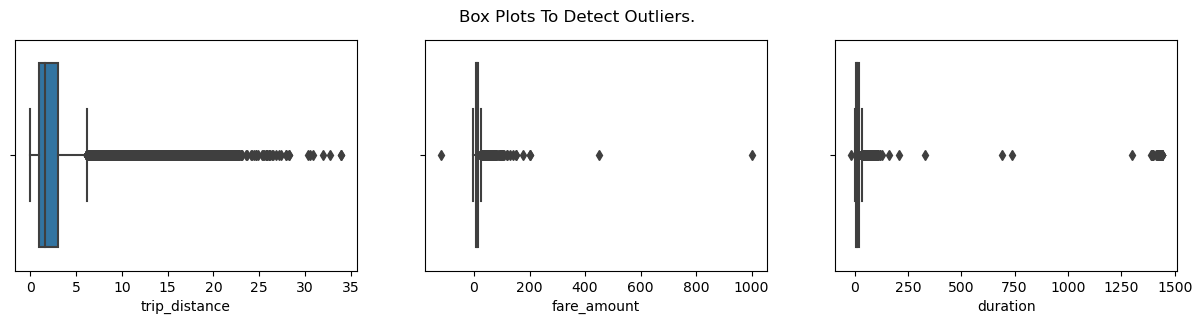

In [69]:
fig,axes = plt.subplots(1,3,figsize=(15,3))
fig.suptitle("Box Plots To Detect Outliers.")
sns.boxplot(ax = axes[0], x = df_copy['trip_distance'])
sns.boxplot(ax = axes[1], x = df_copy['fare_amount'])
sns.boxplot(ax= axes[2], x = df_copy['duration'])
plt.show()

##### It shows that all three columns 'trip_distance', 'fare_amount', and 'duration' contain outliers. Some are extreme outliers while others not.

In [70]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [71]:
sum(df['trip_distance'] == 0)

148

In [72]:
### 148 rides are having 'trip_distance' as 0

In [73]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [74]:
# The 'fare_amount' columns has negative value, although amount can't be negative and highest value is 999 which is again inspectable as majority of amount values are up to 15$ only. So this need to be inspected.

In [75]:
df.loc[df['fare_amount']<0,'fare_amount'] = 0
df['fare_amount'].min()

0.0

In [76]:
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        df_copy.loc[df_copy[col]< 0, col] = 0

    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + (iqr_factor * iqr)
    print("q3: ",q3)
    print("IQR: ",iqr)
    print("Upper Threshold: ", upper_threshold)

    df_copy.loc[df_copy[col] > upper_threshold, col] = upper_threshold
    print(df_copy[col].describe())
    print()

In [77]:
outlier_imputer(['fare_amount'],6)

q3:  14.5
IQR:  8.0
Upper Threshold:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [78]:
df_copy['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [79]:
outlier_imputer(['duration'], 6)

q3:  18.383333333333333
IQR:  11.733333333333333
Upper Threshold:  88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



In [80]:
df_copy['pickup_dropoff'] = df_copy['PULocationID'].astype(str) + '&' + df_copy['DOLocationID'].astype(str)
df_copy['pickup_dropoff']


0        100&231
1         186&43
2        262&236
3         188&97
4          4&112
          ...   
22694     48&186
22695    132&164
22696    107&234
22697     68&144
22698    239&236
Name: pickup_dropoff, Length: 22699, dtype: object

In [81]:
mean_distance_pickup_dropoff = df_copy.groupby('pickup_dropoff').mean(numeric_only = True)[['trip_distance']]
mean_distance_pickup_dropoff

,trip_distance
pickup_dropoff,
1&1,2.433333
10&148,15.700000
100&1,16.890000
100&100,0.253333
100&107,1.180000
...,...
97&65,0.500000
97&66,1.400000
97&80,3.840000


In [82]:
mean_distance_pickup_dropoff_to_dict = mean_distance_pickup_dropoff.to_dict()

In [84]:
mean_distance_pickup_dropoff_to_dict = mean_distance_pickup_dropoff_to_dict['trip_distance']
mean_distance_pickup_dropoff_to_dict

{'1&1': 2.433333333333333,
 '10&148': 15.7,
 '100&1': 16.89,
 '100&100': 0.25333333333333335,
 '100&107': 1.18,
 '100&113': 2.024,
 '100&114': 1.94,
 '100&12': 4.55,
 '100&125': 2.84,
 '100&13': 4.201666666666667,
 '100&132': 17.2175,
 '100&137': 1.299,
 '100&138': 10.432857142857143,
 '100&140': 2.746,
 '100&141': 2.11,
 '100&142': 1.6958333333333335,
 '100&143': 1.5825,
 '100&144': 3.0066666666666664,
 '100&148': 4.1066666666666665,
 '100&151': 3.668,
 '100&152': 4.9,
 '100&158': 1.938,
 '100&161': 0.9813888888888889,
 '100&162': 1.2163636363636363,
 '100&163': 1.2656,
 '100&164': 0.841,
 '100&166': 5.199999999999999,
 '100&170': 0.8548,
 '100&177': 12.0,
 '100&181': 9.34,
 '100&186': 0.6404761904761904,
 '100&193': 4.39,
 '100&198': 9.01,
 '100&202': 5.3,
 '100&209': 4.43,
 '100&211': 2.48,
 '100&224': 1.9500000000000002,
 '100&225': 7.5,
 '100&229': 1.7850000000000001,
 '100&230': 0.72975,
 '100&231': 3.5216666666666665,
 '100&232': 3.8449999999999998,
 '100&233': 1.245833333333333

In [85]:
df_copy['mean_distance'] = df_copy['pickup_dropoff']
df_copy['mean_distance'] = df_copy['mean_distance'].map(mean_distance_pickup_dropoff_to_dict)

In [86]:
df_copy[(df_copy['PULocationID'] == 100 ) & (df_copy['DOLocationID'] == 231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [87]:
duration_grouped = df_copy.groupby('pickup_dropoff').mean(numeric_only = True)[['duration']]
duration_grouped

,duration
pickup_dropoff,
1&1,0.466667
10&148,69.366667
100&1,48.183333
100&100,3.130556
100&107,11.200000
...,...
97&65,4.483333
97&66,11.233333
97&80,23.833333


In [88]:
duration_dict = duration_grouped.to_dict()
duration_dict = duration_dict['duration']
#duration_dict

In [89]:
df_copy['mean_duration'] = df_copy['pickup_dropoff']
df_copy['mean_duration'] = df_copy['mean_duration'].map(duration_dict)

In [90]:
df_copy[(df_copy['PULocationID'] == 100) & (df_copy['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [91]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,March,Saturday,14.066667,100&231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,April,Tuesday,26.500000,186&43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,December,Friday,7.200000,262&236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,May,Sunday,30.250000,188&97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,April,Saturday,16.716667,4&112,4.435000,14.616667


In [92]:
df_copy['rush_hour'] = df_copy['tpep_pickup_datetime'].dt.hour

In [93]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,March,Saturday,14.066667,100&231,3.521667,22.847222,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,April,Tuesday,26.500000,186&43,3.108889,24.470370,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,December,Friday,7.200000,262&236,0.881429,7.250000,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,May,Sunday,30.250000,188&97,3.700000,30.250000,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,April,Saturday,16.716667,4&112,4.435000,14.616667,23


In [94]:
df_copy.loc[df_copy['day'].isin(['Saturday','Sunday']),'rush_hour'] = 0

In [95]:
def rush_hourizer(hour):
    if 6<=hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        df_copy['rush_hour'] = df_copy.apply(rush_hourizer,axis=1)
        df_copy.head()
        val=1
    else:
        val = 0
    return val

In [96]:
#df_copy['rush_hour'] = df_copy.apply(rush_hourizer,axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [97]:
#df_copy['rush_hour'] = df_copy.apply(rush_hour,axis = 1)

In [98]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,March,Saturday,14.066667,100&231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,April,Tuesday,26.500000,186&43,3.108889,24.470370,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,December,Friday,7.200000,262&236,0.881429,7.250000,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,May,Sunday,30.250000,188&97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,April,Saturday,16.716667,4&112,4.435000,14.616667,0


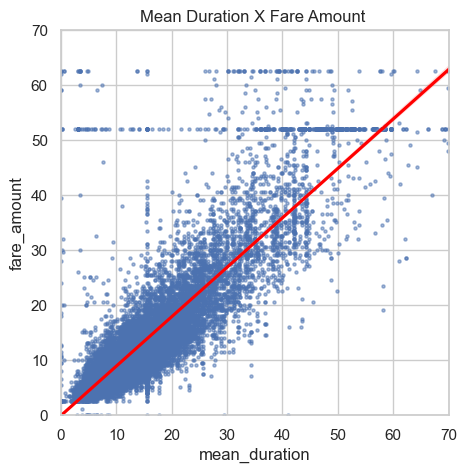

In [99]:
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x= df_copy['mean_duration'], y = df_copy['fare_amount'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws={'color':'red'})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title("Mean Duration X Fare Amount ")
plt.show()

In [100]:
df_copy[df_copy['fare_amount']>50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [101]:
pd.set_option('display.max_columns',None)
df_copy[df_copy['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,March,Sunday,36.800000,236&132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,June,Saturday,66.850000,132&163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,November,Saturday,0.966667,132&132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,December,Wednesday,29.183333,132&79,19.431667,47.275000,23
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,September,Sunday,29.483333,132&234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,February,Tuesday,39.833333,132&48,18.761905,58.246032,18
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,June,Monday,15.616667,228&88,4.730000,15.616667,12
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,August,Thursday,45.450000,132&48,18.761905,58.246032,22
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,September,Tuesday,42.850000,186&132,17.096000,42.920000,13
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,April,Sunday,71.583333,132&148,17.994286,46.340476,0


In [102]:
df_copy.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'month', 'day',
       'duration', 'pickup_dropoff', 'mean_distance', 'mean_duration',
       'rush_hour'],
      dtype='object')

In [103]:
df_copy2 = df_copy.copy()
df_copy2

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,March,Saturday,14.066667,100&231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,April,Tuesday,26.500000,186&43,3.108889,24.470370,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,December,Friday,7.200000,262&236,0.881429,7.250000,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,May,Sunday,30.250000,188&97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,April,Saturday,16.716667,4&112,4.435000,14.616667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,February,Friday,3.266667,48&186,1.098214,8.594643,17
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,August,Sunday,40.800000,132&164,18.757500,59.560417,0
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,September,Monday,4.133333,107&234,0.684242,6.609091,14
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,July,Saturday,11.933333,68&144,2.077500,16.650000,0


In [104]:
df_copy2 = df_copy2.drop(['Unnamed: 0',  'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'month', 'day',
       'duration', 'pickup_dropoff'],axis=1)
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


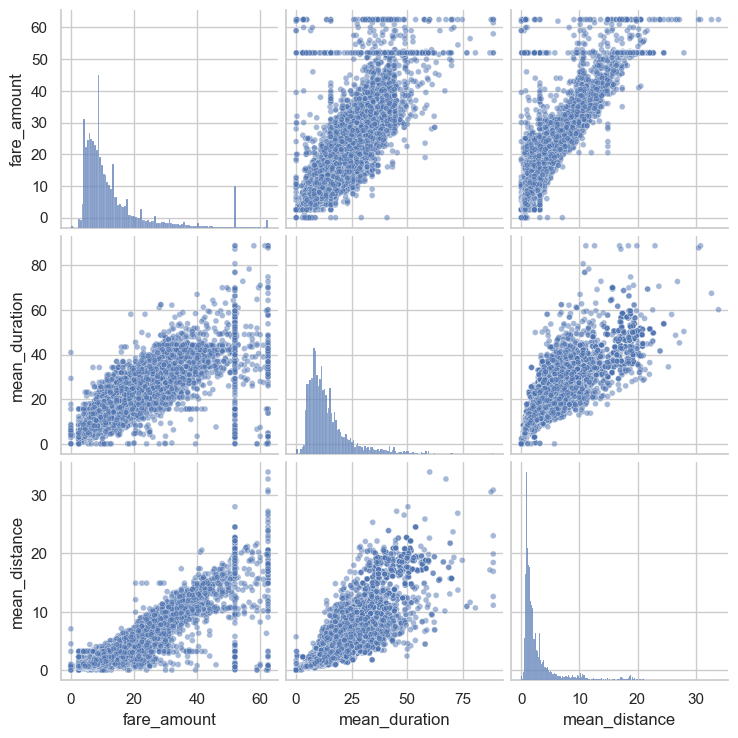

In [105]:
sns.pairplot(df_copy[['fare_amount','mean_duration','mean_distance']],plot_kws={'alpha':0.5, 'size':5})

In [106]:
# All variables show linear relationship with each other.

In [107]:
df_copy2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,0.003815
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.010907
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,0.009739
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.010751
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,0.015471
rush_hour,0.003815,-0.010907,0.009739,-0.010751,0.015471,1.000000


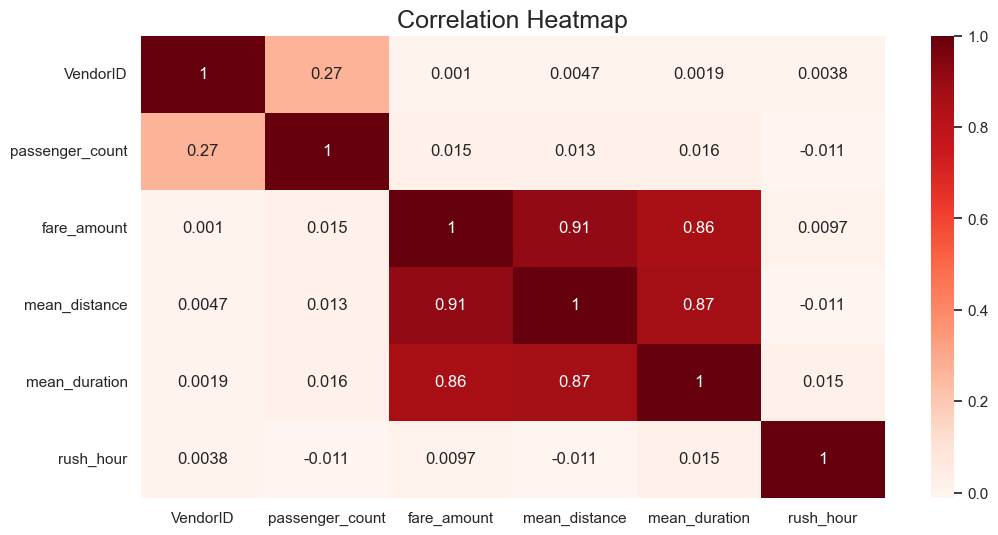

In [108]:
plt.figure(figsize=(12,6))
sns.heatmap(df_copy2.corr(method='pearson'),annot = True, cmap = 'Reds')
plt.title('Correlation Heatmap', fontsize = 18)
plt.show()

### Splitting the data into train and testing

In [109]:
X = df_copy2.drop(columns = 'fare_amount')
y = df_copy2[['fare_amount']]

In [110]:
X.head()
#print(len(X))

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,14
2,1,1,0.881429,7.250000,7
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [111]:
y.head()
#print(len(y))

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


In [112]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fare_amount  22699 non-null  float64
dtypes: float64(1)
memory usage: 177.5 KB


In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
print(X_scaled.shape)

[[ 0.8931955   3.39065627  0.17093801  0.83195364 -1.25345437]
 [-1.11957573 -0.4997803   0.05495383  0.99296921  0.4796596 ]
 [-1.11957573 -0.4997803  -0.57092814 -0.7152838  -0.38689738]
 ...
 [ 0.8931955  -0.4997803  -0.62633441 -0.77886169  0.4796596 ]
 [ 0.8931955  -0.4997803  -0.23485053  0.21719198 -1.25345437]
 [-1.11957573 -0.4997803  -0.40359028 -0.50145366  0.35586575]]
(22699, 5)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
r_sq_train = lr.score(X_train,y_train)
print("Coefficient of determination:- ", r_sq_train)
y_pred_train = lr.predict(X_train)
print("R^2:- ",r2_score(y_train,y_pred_train))
print("MAE:- ", mean_absolute_error(y_train,y_pred_train))
print("MSE:- ", mean_squared_error(y_train,y_pred_train))
print("RMSE:- ", np.sqrt(mean_squared_error(y_train,y_pred_train)))

Coefficient of determination:-  0.8399005858935238
R^2:-  0.8399005858935238
MAE:-  2.185831344729344
MSE:-  17.883351745932664
RMSE:-  4.228871214157824


In [117]:
r_sq_test = lr.score(X_test,y_test)
print("Coefficient of determination:- ", r_sq_test)
y_pred_test = lr.predict(X_test)
print("R^2:- ",r2_score(y_test,y_pred_test))
print("MAE:- ", mean_absolute_error(y_test,y_pred_test))
print("MSE:- ", mean_squared_error(y_test,y_pred_test))
print("RMSE:- ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Coefficient of determination:-  0.8680858771386532
R^2:-  0.8680858771386532
MAE:-  2.1381788902629513
MSE:-  14.345211535170463
RMSE:-  3.7875072983653064


1. The model performance on both train and test set is higher. It suggests that no bias is there in the model and the model is not overfit.
2. R2 Score on test data is 0.868 which suggest 86.8% of variance in the dataset is described by the model.
3. The MAE is informative here because, an error of two is not more than twice as bad as an error of one.

### RESULTS

In [118]:
results = pd.DataFrame(data = {'actual':y_test['fare_amount'],
                              'predicted':y_pred_test.ravel()})
results['residuals'] = results['actual'] - results['predicted']
results.sort_values(by ="predicted", ascending= True)


,actual,predicted,residuals
22566,0.0,2.879361,-2.879361
22026,10.5,3.064285,7.435715
7327,24.0,3.215950,20.784050
7167,52.0,3.263833,48.736167
4890,3.5,4.283959,-0.783959
...,...,...,...
7767,52.0,65.484113,-13.484113
11542,52.0,65.871107,-13.871107
10032,52.0,67.049958,-15.049958
4138,62.5,76.697070,-14.197070


In [119]:
nyc_pred_data = pd.DataFrame(data={'mean_duration':df_copy2['mean_duration'],
                                  'mean_distance': df_copy2['mean_distance']})
nyc_pred_data

,mean_duration,mean_distance
0,22.847222,3.521667
1,24.470370,3.108889
2,7.250000,0.881429
3,30.250000,3.700000
4,14.616667,4.435000
...,...,...
22694,8.594643,1.098214
22695,59.560417,18.757500
22696,6.609091,0.684242
22697,16.650000,2.077500


In [120]:
nyc_pred_data['predicted_fare'] =  lr.predict(X_scaled)

In [ ]:
#nyc_pred_data.to_csv('nyc_pred_means.csv',index= False)

Text(0.5, 1.0, 'Actual vs Predicted')

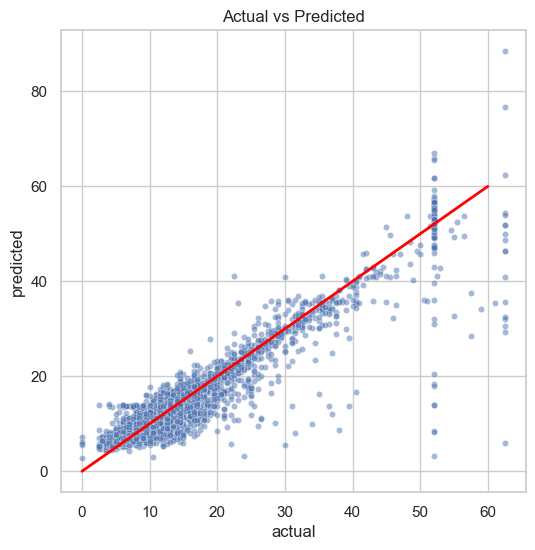

In [122]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'actual',
               y = 'predicted',
               data = results,
               s = 20,
               alpha = 0.5,
               ax = ax
               )
plt.plot([0,60],[0,60],c = 'red', linewidth = 2)
plt.title("Actual vs Predicted")

In [123]:
results['residuals'].mean()

-0.015470572802780564

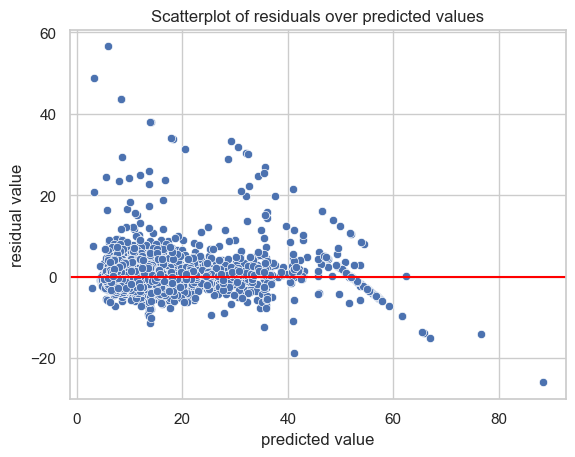

In [124]:
sns.scatterplot(x='predicted', y='residuals', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [125]:
coefficients = pd.DataFrame(lr.coef_, columns = X.columns)
coefficients

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,-0.055376,0.029249,7.106832,2.798094,0.136127


# Step 6: Building and Comparing Machine Learning Model

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [127]:
pd.set_option('display.max_columns',None)

In [128]:
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.066667,100&231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.500000,186&43,3.108889,24.470370,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.200000,262&236,0.881429,7.250000,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000,188&97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,16.716667,4&112,4.435000,14.616667,0


In [129]:
print(df_copy.shape)

(22699, 25)


In [130]:
df_copy2.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,14
2,1,1,6.5,0.881429,7.250000,7
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


In [131]:
df_copy2.shape

(22699, 6)

In [132]:
nyc_pred_means = pd.read_csv('nyc_pred_means.csv')
nyc_pred_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.322800
1,24.470370,3.108889,16.182650
2,7.250000,0.881429,6.836798
3,30.250000,3.700000,18.619912
4,14.616667,4.435000,15.748302


In [133]:
df = df.merge(nyc_pred_means, left_index=True,right_index=True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,mean_duration,mean_distance,predicted_fare
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,22.847222,3.521667,16.322800
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,24.470370,3.108889,16.182650
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.250000,0.881429,6.836798
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000,3.700000,18.619912
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,14.616667,4.435000,15.748302


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [135]:
df1 = df[df['payment_type'] == 1]
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,mean_duration,mean_distance,predicted_fare
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,March,Saturday,22.847222,3.521667,16.322800
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,April,Tuesday,24.470370,3.108889,16.182650
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,December,Friday,7.250000,0.881429,6.836798
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,May,Sunday,30.250000,3.700000,18.619912
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,March,Saturday,11.855376,2.052258,10.337520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,July,Sunday,18.016667,5.700000,19.329590
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,August,Thursday,8.095370,1.062778,7.574901
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,August,Sunday,59.560417,18.757500,56.824068
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,July,Saturday,16.650000,2.077500,11.604978


In [136]:
df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])
df1['tip_percent']

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\793737172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])


0        0.200000
1        0.238095
2        0.198630
3        0.300000
5        0.200000
           ...   
22692    0.199507
22693    0.200000
22695    0.250000
22697    0.150442
22698    0.199153
Name: tip_percent, Length: 15265, dtype: float64

In [137]:
# Now create a column for generous tipper to check it whether there are generous tipper or not.

In [138]:
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.20)
df['generous']  = df1['generous'].astype(int)

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\516017611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent']
C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\516017611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = (df1['generous'] >= 0.20)


In [139]:
df['generous']

0        1.0
1        1.0
2        0.0
3        1.0
4        NaN
        ... 
22694    NaN
22695    1.0
22696    NaN
22697    0.0
22698    0.0
Name: generous, Length: 22699, dtype: float64

In [140]:
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['am_rush']

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\3021615430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour


0         8
1        14
2         7
3        13
5        20
         ..
22692     3
22693    22
22695    16
22697    12
22698    13
Name: am_rush, Length: 15265, dtype: int64

In [141]:
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
df1['daytime']

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\2791744380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour


0         8
1        14
2         7
3        13
5        20
         ..
22692     3
22693    22
22695    16
22697    12
22698    13
Name: daytime, Length: 15265, dtype: int64

In [142]:
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['pm_rush']

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\1831542430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour


0         8
1        14
2         7
3        13
5        20
         ..
22692     3
22693    22
22695    16
22697    12
22698    13
Name: pm_rush, Length: 15265, dtype: int64

In [143]:
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour
df1['nighttime']

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\3028709023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour


0         8
1        14
2         7
3        13
5        20
         ..
22692     3
22693    22
22695    16
22697    12
22698    13
Name: nighttime, Length: 15265, dtype: int64

In [144]:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val    

In [145]:
df1['am_rush'] = df1.apply(am_rush, axis = 1)
df1['am_rush'].head()

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\3374289504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1.apply(am_rush, axis = 1)


0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [146]:
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [147]:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [148]:
def nighttime(hour):
    if 20<= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val    

In [149]:
df1['pm_rush'] = df1.apply(pm_rush, axis = 1)
df1['pm_rush']

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\3266772388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1.apply(pm_rush, axis = 1)


0        0
1        0
2        0
3        0
5        0
        ..
22692    0
22693    0
22695    1
22697    0
22698    0
Name: pm_rush, Length: 15265, dtype: int64

In [150]:
df1['daytime'] = df1.apply(daytime, axis = 1)
df1['daytime'].head()

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\1676375798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1.apply(daytime, axis = 1)


0    0
1    1
2    0
3    1
5    0
Name: daytime, dtype: int64

In [151]:
df1['nighttime'] = df1.apply(nighttime, axis = 1)
df1['nighttime'].head()

C:\Users\uttam\AppData\Local\Temp\ipykernel_16204\1661018205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1.apply(nighttime, axis = 1)


0    0
1    0
2    0
3    0
5    1
Name: nighttime, dtype: int64

In [152]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,mean_duration,mean_distance,predicted_fare,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,22.847222,3.521667,16.322800,0.200000,True,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,24.470370,3.108889,16.182650,0.238095,True,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.250000,0.881429,6.836798,0.198630,False,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000,3.700000,18.619912,0.300000,True,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,11.855376,2.052258,10.337520,0.200000,True,0,0,0,1


In [153]:
df1.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'month', 'day',
       'mean_duration', 'mean_distance', 'predicted_fare', 'tip_percent',
       'generous', 'am_rush', 'daytime', 'pm_rush', 'nighttime'],
      dtype='object')

In [154]:
drop_columns = ['Unnamed: 0', 'tpep_pickup_datetime','tpep_dropoff_datetime', 'trip_distance',
        'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent']

In [155]:
df1 = df1.drop(drop_columns, axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   month            15265 non-null  object 
 6   day              15265 non-null  object 
 7   mean_duration    15265 non-null  float64
 8   mean_distance    15265 non-null  float64
 9   predicted_fare   15265 non-null  float64
 10  generous         15265 non-null  bool   
 11  am_rush          15265 non-null  int64  
 12  daytime          15265 non-null  int64  
 13  pm_rush          15265 non-null  int64  
 14  nighttime        15265 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(2)
memory usage: 2.3+ MB


In [156]:
cols_to_str = ['RatecodeID','PULocationID', 'DOLocationID', 'VendorID']
for col in cols_to_str:
    df1[col] = df1[col].astype('str')

In [157]:
df2 = pd.get_dummies(df1, drop_first= True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to day_Wednesday
dtypes: bool(1), float64(3), int64(5), uint8(338)
memory usage: 6.5 MB


In [212]:
generous_value_count = df2['generous'].value_counts(normalize = True) * 100 
generous_value_count

False    65.142483
True     34.857517
Name: generous, dtype: float64

Text(0.5, 1.0, 'Non-Generous vs Generous Tippers')

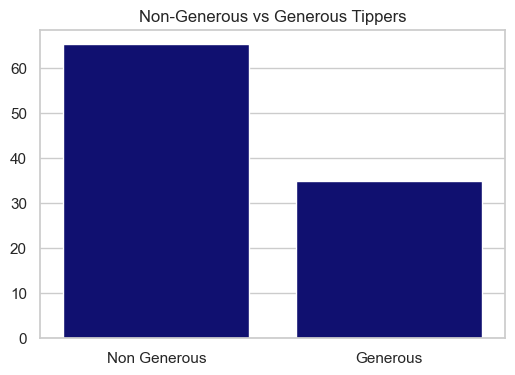

In [215]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x = generous_value_count.index, y = generous_value_count.values, palette= ['navy'])
plt.xticks([0,1],['Non Generous','Generous'])
plt.title('Non-Generous vs Generous Tippers')

In [159]:
# Approximately 1/3 of the tipper are generous tippers. The dataset is imbalanced but not so.

# ML Modelling for Generous Tippers

In [160]:
y = df2['generous']
X = df2.drop('generous', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size =0.2, random_state = 42)

In [161]:
rf = RandomForestClassifier(random_state = 0)
cv_params = { 'max_depth' : [None],
             'max_features' : [1.0],
             'max_samples' : [0.7],
             'min_samples_leaf' : [1],
             'min_samples_split' : [2],
             'n_estimators': [300]
             }
scoring = {'accuracy', 'precision', 'recall','f1'}

In [162]:
rf1 = GridSearchCV(rf,cv_params,scoring=scoring,cv = 4, refit = 'f1')

In [163]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [164]:
rf1.best_score_

0.32740786490258106

In [165]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [182]:
rf_preds = rf1.best_estimator_.predict(X_test)

In [174]:
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)
cv_params = { 'learning_rate' :[0.1],
             'max_depth' : [8],
             'min_child_weight' : [2],
             'n_estimators': [500]    
            }
scoring = {'accuracy','precision','recall','f1'}
xgb1 = GridSearchCV(xgb,cv_params, scoring = scoring, cv=4, refit = 'f1')

In [175]:
xgb1.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [176]:
xgb1.best_score_

0.35282576309509495

In [177]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [192]:
xgb_preds = xgb1.best_estimator_.predict(X_test)

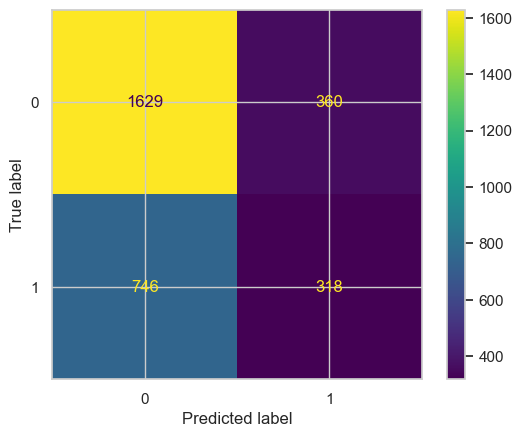

In [179]:
cm = confusion_matrix(y_test, preds, labels = xgb1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix  = cm, display_labels= xgb1.classes_)
disp.plot();

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

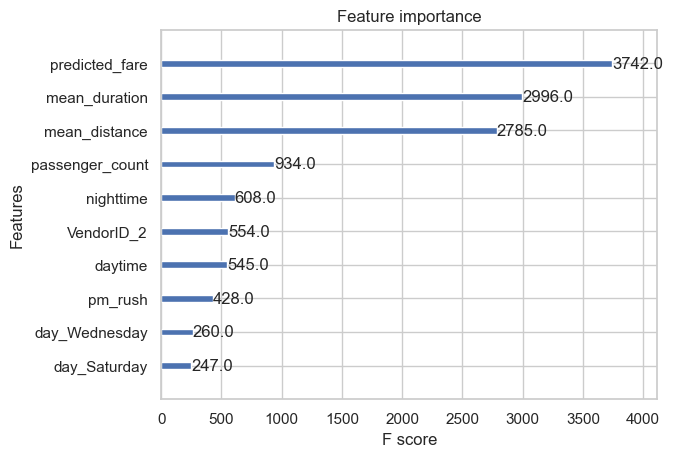

In [180]:
plot_importance(xgb1.best_estimator_, max_num_features = 10)

In [184]:
def get_test_score(model_name: str, preds, y_test_data):
    accuracy = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame(data = {'model':[model_name],
                                'precision':[precision],
                                'recall':[recall],
                                'F1':[f1],
                                'accuracy':[accuracy]})

    return table

In [185]:
rf_test_score = get_test_score('RF_Test',rf_preds,y_test)

In [186]:
rf_test_score

,model,precision,recall,F1,accuracy
0,RF_Test,0.484945,0.287594,0.361062,0.645267


In [193]:
xgb_test_score = get_test_score('XGB_Test',xgb_preds,y_test)
xgb_test_score

,model,precision,recall,F1,accuracy
0,XGB_Test,0.469027,0.298872,0.365098,0.637733


In [199]:
def make_results(model_name: str, model_object, metric:str):
    metric_dict = {'precision':'mean_test_precision',
                   'recall':'mean_test_recall',
                   'f1':'mean_test_f1',
                   'accuracy':'mean_test_accuracy'}
    
    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]

    accuracy = best_estimator_results.mean_test_accuracy
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1

    table = pd.DataFrame(data = {'model':[model_name],
                                'precision':[precision],
                                'recall':[recall],
                                'F1':[f1],
                                'accuracy':[accuracy]})

    return table

In [200]:
rf_results = make_results('RF CV',rf1,'f1')
rf_results

,model,precision,recall,F1,accuracy
0,RF CV,0.442843,0.260282,0.327408,0.627579


In [202]:
xgb_results = make_results('XGB CV',xgb1,'f1')
xgb_results

,model,precision,recall,F1,accuracy
0,XGB CV,0.435837,0.296689,0.352826,0.620455


In [205]:
rf_results = pd.concat([rf_results,rf_test_score],axis = 0)
rf_results

,model,precision,recall,F1,accuracy
0,RF CV,0.442843,0.260282,0.327408,0.627579
0,RF_Test,0.484945,0.287594,0.361062,0.645267


In [206]:
rf_results = pd.concat([rf_results,xgb_results,xgb_test_score],axis=0)
rf_results

,model,precision,recall,F1,accuracy
0,RF CV,0.442843,0.260282,0.327408,0.627579
0,RF_Test,0.484945,0.287594,0.361062,0.645267
0,XGB CV,0.435837,0.296689,0.352826,0.620455
0,XGB_Test,0.469027,0.298872,0.365098,0.637733
